In [24]:
from src.utils import *
import matplotlib.pyplot as plt
from tqdm import tqdm

In [15]:
EHR_CO = load_data("C:/Users/jayao/Desktop/python_projects/transformer_propensity/data/CO_10/consecutive_occurrence_patient_record.pkl")

In [2]:
EHR_OD = load_data("C:/Users/jayao/Desktop/python_projects/transformer_propensity/data/OD_10/occurrence_distance_patient_record.pkl")

In [16]:
EHR_OW = load_data("C:/Users/jayao/Desktop/python_projects/transformer_propensity/data/OW_10/occurrence_window_patient_record.pkl")

In [17]:
EHR_SD = load_data("C:/Users/jayao/Desktop/python_projects/transformer_propensity/data/synthea/synthea_sinusitis_patient_record.pkl")

In [80]:
def calculate_summary_stat(data_dict):
    
    record_len_list = []
    num_code_list = []
    avg_num_code_list = []
    treatment_list = []
    
    for pid, pid_dict in data_dict.items():
        record_len = len(pid_dict["code_ind"])
        code_num = len(pid_dict["code_collapsed_ind"])
        
        record_len_list.append(record_len)
        num_code_list.append(code_num)
        avg_num_code_list.append(code_num/record_len)
        treatment_list.append(pid_dict["treatment_assignment"])
    
    
    print("number of samples : {}".format(len(data_dict)))
    
    print("avg. record length : {}".format(np.mean(record_len_list)))
    print("avg. codes per sample: {}".format(np.mean(num_code_list)))
    print("avg. codes per record: {}".format(np.mean(avg_num_code_list)))
    print("prev. treatment : {}".format(np.mean(treatment_list)))

In [81]:
calculate_summary_stat(EHR_CO)

number of samples : 12000
avg. record length : 11.636666666666667
avg. codes per sample: 40.68666666666667
avg. codes per record: 3.462046585891749
prev. treatment : 0.542


In [82]:
calculate_summary_stat(EHR_OD)

number of samples : 12000
avg. record length : 10.095666666666666
avg. codes per sample: 31.993166666666667
avg. codes per record: 3.1769014268103466
prev. treatment : 0.4705


In [83]:
calculate_summary_stat(EHR_OW)

number of samples : 12000
avg. record length : 9.993916666666667
avg. codes per sample: 37.053916666666666
avg. codes per record: 3.604001223100885
prev. treatment : 0.483


In [84]:
calculate_summary_stat(EHR_SD)

number of samples : 6864
avg. record length : 5.553613053613054
avg. codes per sample: 5.769376456876457
avg. codes per record: 1.0348083243242772
prev. treatment : 0.522581585081585


In [25]:
def get_ps_distribution(patient_record):
    
    treated_ps = []
    control_ps = []
    
    for pid, item in tqdm(patient_record.items()):
                
        if item["treatment_assignment"] == 1:
            treated_ps.append(item["treatment_prob"])
        else:
            control_ps.append(item["treatment_prob"])
            
    return treated_ps, control_ps

In [39]:
treated_ps_co, control_ps_co = get_ps_distribution(EHR_CO)

100%|████████████████████████████████████████████████████████████████████████| 12000/12000 [00:00<00:00, 374672.63it/s]


In [40]:
treated_ps_od, control_ps_od = get_ps_distribution(EHR_OD)

100%|████████████████████████████████████████████████████████████████████████| 12000/12000 [00:00<00:00, 705893.92it/s]


In [41]:
treated_ps_ow, control_ps_ow = get_ps_distribution(EHR_OW)

100%|████████████████████████████████████████████████████████████████████████| 12000/12000 [00:00<00:00, 685371.79it/s]


In [42]:
treated_ps_sd, control_ps_sd = get_ps_distribution(EHR_SD)

100%|██████████████████████████████████████████████████████████████████████████| 6864/6864 [00:00<00:00, 686678.97it/s]


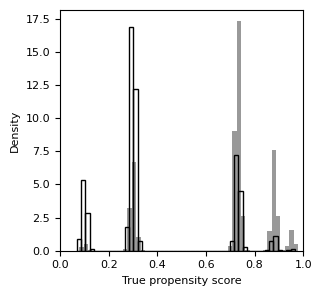

In [76]:
plt.figure(figsize=(3.26*2/2, 3)) 

plt.hist(treated_ps_co, density=True, bins=50, alpha=0.8, color="grey")
plt.hist(control_ps_co, density=True, bins=50, fill=False)
plt.ylabel("Density")
plt.xlabel("True propensity score")
plt.xlim(0,1.0)
plt.tight_layout()
plt.plot()
plt.savefig("C:/Users/jayao/Desktop/ps_plot_co.pdf",pad_inches = 0.0)

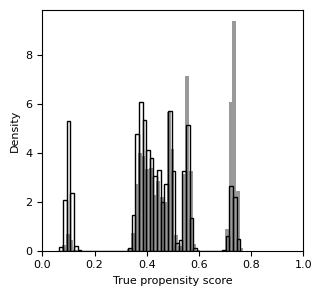

In [77]:
plt.figure(figsize=(3.26*2/2, 3)) 

plt.hist(treated_ps_od, density=True, bins=50, alpha=0.8, color="grey")
plt.hist(control_ps_od, density=True, bins=50, fill=False)
plt.ylabel("Density")
plt.xlabel("True propensity score")
plt.xlim(0,1.0)
plt.tight_layout()
plt.plot()
plt.savefig("C:/Users/jayao/Desktop/ps_plot_od.pdf",pad_inches = 0.0)

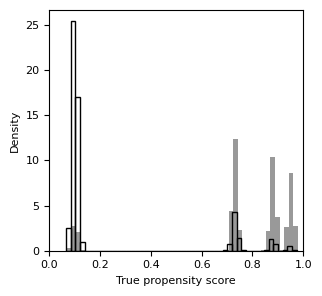

In [78]:
plt.figure(figsize=(3.26*2/2, 3)) 

plt.hist(treated_ps_ow, density=True, bins=50, alpha=0.8, color="grey")
plt.hist(control_ps_ow, density=True, bins=50, fill=False)
plt.ylabel("Density")
plt.xlabel("True propensity score")
plt.xlim(0,1.0)
plt.tight_layout()
plt.plot()
plt.savefig("C:/Users/jayao/Desktop/ps_plot_ow.pdf",pad_inches = 0.0)

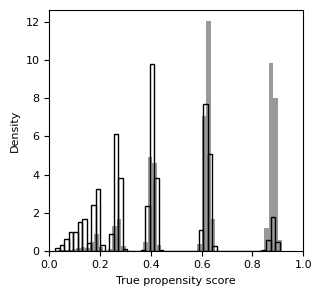

In [79]:
plt.figure(figsize=(3.26*2/2, 3)) 
plt.tight_layout()

plt.hist(treated_ps_sd, density=True, bins=50, alpha=0.8, color="grey")
plt.hist(control_ps_sd, density=True, bins=50, fill=False)
plt.ylabel("Density")
plt.xlabel("True propensity score")
plt.xlim(0,1.0)
plt.tight_layout()
plt.plot()
plt.savefig("C:/Users/jayao/Desktop/ps_plot_sd.pdf",pad_inches = 0.0)